In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import numpy as np
from IPython.display import HTML

In [144]:
sns.set_style('whitegrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes

In [145]:
csv_file_path = "pbtype_cleaned.csv"
df = pd.read_csv(csv_file_path)

In [146]:
# Data spot check
first_5_rows = df.head(5)
print(first_5_rows)

   STATE  ST_CASE  PER_NO  PBPTYPE  PBAGE  PBSEX  PBCWALK  PBSWALK  PBSZONE  \
0      1    10065       1        6     38      1        0        0        0   
1      1    10856       1        6     63      1        0        0        0   
2      1    10973       1        6     19      1        0        0        0   
3      2    20031       1        6     50      2        0        0        0   
4      4    40018       1        6     70      2        0        0        0   

   BIKECTYPE  ...  PBAGENAME  PBSEXNAME  PBCWALKNAME  PBSWALKNAME  \
0        231  ...   38 Years       Male   None Noted   None Noted   
1        144  ...   63 Years       Male   None Noted   None Noted   
2        155  ...   19 Years       Male   None Noted   None Noted   
3        235  ...   50 Years     Female   None Noted   None Noted   
4        141  ...   70 Years     Female   None Noted   None Noted   

   PBSZONENAME                                      BIKECTYPENAME  \
0   None Noted         Motorist Overtakin

In [147]:
# Data spot check (continued)
bike_biketype_counts = df['BIKECTYPENAME'].value_counts().head()
print(bike_biketype_counts)

Motorist Overtaking - Other/ Unknown          724
Motorist Overtaking - Undetected Bicyclist    458
Parallel Paths - Other / Unknown              340
Bicyclist Left Turn - Same Direction          322
Motorist Overtaking - Misjudged Space         307
Name: BIKECTYPENAME, dtype: int64


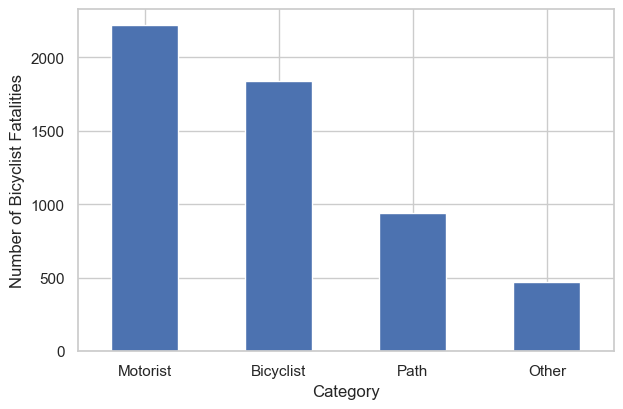

In [335]:
# Function to combine categories containing "Motorist", "Bicyclist", "path", or "Other"
def combine_categories(category):
    if "Motorist" in category:
        return "Motorist"
    elif "Bicyclist" in category:
        return "Bicyclist"
    elif "path" in category.lower():
        return "Path"
    else:
        return "Other"

# Create a new column with the combined BIKECTYPENAME_CATEGORY
df['BIKECTYPENAME_CATEGORY'] = df['BIKECTYPENAME_CATEGORY'].apply(combine_categories)

# Count the occurrences of each unique BIKECTYPENAME_CATEGORY after combining
bikectypename_category_counts = df['BIKECTYPENAME_CATEGORY'].value_counts()

# Create a bar chart for the BIKECTYPENAME_CATEGORY counts
plt.figure()
bikectypename_category_counts.plot(kind='bar')

# Wrap the tick labels if they are too long and rotate them horizontally
labels = bikectypename_category_counts.index.tolist()
wrapped_labels = [textwrap.fill(label, 10) for label in labels]
plt.xticks(range(len(bikectypename_category_counts.index)), wrapped_labels, rotation=0)

plt.xlabel('Category')
plt.ylabel('Number of Bicyclist Fatalities')
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

In [176]:
# Count the number of unique values in the 'BIKECTYPENAME' column
unique_bikectypename_count = df['BIKECTYPENAME'].nunique()

# Count the number of unique values in the 'BIKECTYPENAME_CATEGORY' column
unique_bikectypename_category_count = df['BIKECTYPENAME_CATEGORY'].nunique()

print("Number of unique values in BIKECTYPENAME:", unique_bikectypename_count)
print("Number of unique values in BIKECTYPENAME_CATEGORY:", unique_bikectypename_category_count)

Number of unique values in BIKECTYPENAME: 78
Number of unique values in BIKECTYPENAME_CATEGORY: 4


In [296]:
bike_biketypecategory_counts = df['BIKECTYPENAME_CATEGORY'].value_counts()
print(bike_biketypecategory_counts)

Motorist     2218
Bicyclist    1837
Path          943
Other         471
Name: BIKECTYPENAME_CATEGORY, dtype: int64


In [328]:
# Filter the DataFrame for 'Motorist' category
motorist_df = df[df['BIKECTYPENAME_CATEGORY'] == 'Motorist']

# Check if the pairings 'Travel Lane' and 'With Traffic' exist in each row
has_travel_lane = motorist_df['BIKEPOSNAME'] == 'Travel Lane'
has_with_traffic = motorist_df['BIKEDIRNAME'] == 'With Traffic'

# Rows with 'Travel Lane' and 'With Traffic'
both_pairings = has_travel_lane & has_with_traffic
percentage_both_pairings = (both_pairings.sum() / len(motorist_df)) * 100

# Rows with 'Travel Lane' but NOT 'With Traffic'
travel_lane_not_with_traffic = has_travel_lane & ~has_with_traffic
percentage_travel_lane_not_with_traffic = (travel_lane_not_with_traffic.sum() / len(motorist_df)) * 100

# Rows with NOT 'Travel Lane' but 'With Traffic'
not_travel_lane_with_traffic = ~has_travel_lane & has_with_traffic
percentage_not_travel_lane_with_traffic = (not_travel_lane_with_traffic.sum() / len(motorist_df)) * 100

# Rows with NOT 'With Traffic' and NOT 'Travel Lane'
not_with_traffic_not_travel_lane = ~has_with_traffic & ~has_travel_lane
percentage_not_with_traffic_not_travel_lane = (not_with_traffic_not_travel_lane.sum() / len(motorist_df)) * 100

# Print the percentages
print(f"Percentage of rows with 'Travel Lane' and 'With Traffic': {percentage_both_pairings:.2f}%")
print(f"Percentage of rows with 'Travel Lane' but NOT 'With Traffic': {percentage_travel_lane_not_with_traffic:.2f}%")
print(f"Percentage of rows with NOT 'Travel Lane' but 'With Traffic': {percentage_not_travel_lane_with_traffic:.2f}%")
print(f"Percentage of rows with NOT 'With Traffic' and NOT 'Travel Lane': {percentage_not_with_traffic_not_travel_lane:.2f}%")

Percentage of rows with 'Travel Lane' and 'With Traffic': 68.58%
Percentage of rows with 'Travel Lane' but NOT 'With Traffic': 4.91%
Percentage of rows with NOT 'Travel Lane' but 'With Traffic': 21.19%
Percentage of rows with NOT 'With Traffic' and NOT 'Travel Lane': 5.32%


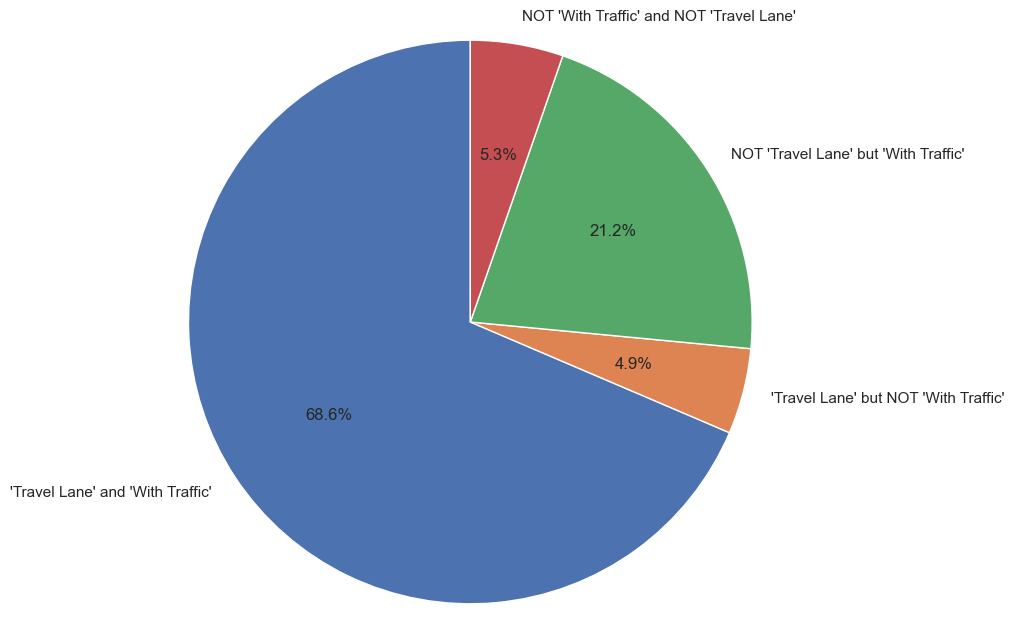

In [330]:
# Percentages for each combination
percentages = [
    percentage_both_pairings,
    percentage_travel_lane_not_with_traffic,
    percentage_not_travel_lane_with_traffic,
    percentage_not_with_traffic_not_travel_lane
]

# Labels for the pie chart
labels = [
    "'Travel Lane' and 'With Traffic'",
    "'Travel Lane' but NOT 'With Traffic'",
    "NOT 'Travel Lane' but 'With Traffic'",
    "NOT 'With Traffic' and NOT 'Travel Lane'"
]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

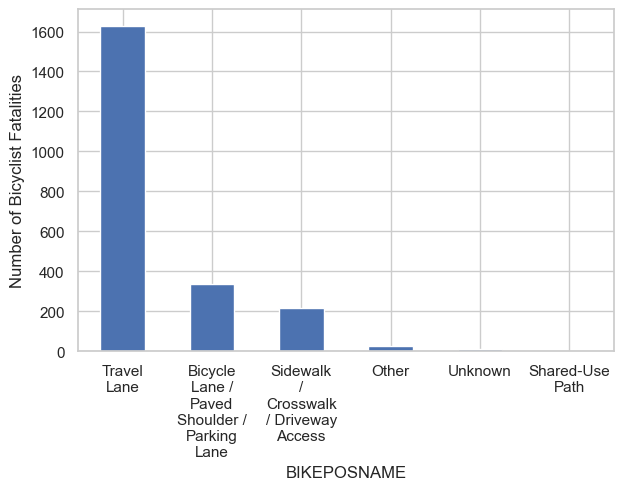

Travel Lane                                     1630
Bicycle Lane / Paved Shoulder / Parking Lane     336
Sidewalk  / Crosswalk / Driveway Access          215
Other                                             26
Unknown                                           10
Shared-Use Path                                    1
Name: BIKEPOSNAME, dtype: int64


In [332]:
# Filter the DataFrame for 'Motorist' category
motorist_df = df[df['BIKECTYPENAME_CATEGORY'] == 'Motorist']

# Count the occurrences of each unique BIKEPOSNAME within the 'Motorist' category
bikeposname_counts = motorist_df['BIKEPOSNAME'].value_counts()

# Create a bar chart for the BIKEPOSNAME counts within 'Motorist' category
plt.figure()
bikeposname_counts.plot(kind='bar')

# Wrap the tick labels if they are too long and rotate them horizontally
labels = bikeposname_counts.index.tolist()
wrapped_labels = [textwrap.fill(label, 10) for label in labels]
plt.xticks(range(len(bikeposname_counts.index)), wrapped_labels, rotation=0)

plt.xlabel('BIKEPOSNAME')
plt.ylabel('Number of Bicyclist Fatalities')
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

# Print the counts of each unique BIKEPOSNAME within the 'Motorist' category
print(bikeposname_counts)

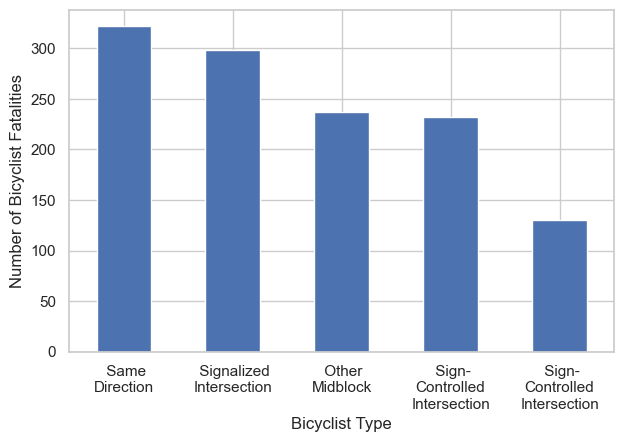

In [334]:
# Filter the DataFrame for 'Bicyclist' category
bicyclist_df = df[df['BIKECTYPENAME_CATEGORY'] == 'Bicyclist']

# Count the occurrences of each unique BIKECTYPENAME within the 'Bicyclist' category
bike_locname_counts = bicyclist_df['BIKECTYPENAME'].value_counts().head(5)

# Wrap the tick labels if they are too long
labels = bike_locname_counts.index.tolist()
wrapped_labels = [textwrap.fill(label.split('-', 1)[1], 12) for label in labels]

# Plot the counts of BIKECTYPENAME within 'Bicyclist' category with wrapped x-axis labels
plt.figure()
bike_locname_counts.plot(kind='bar')
plt.xticks(range(len(bike_locname_counts.index)), wrapped_labels, rotation=0)
plt.xlabel('Bicyclist Type')
plt.ylabel('Number of Bicyclist Fatalities')
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

In [285]:
# Filter the DataFrame for 'Bicyclist' category
bicyclist_df = df[df['BIKECTYPENAME_CATEGORY'] == 'Bicyclist']

# Count the occurrences of each unique BIKECTYPENAME within the 'Bicyclist' category
bike_cgp_counts = bicyclist_df['BIKECTYPENAME'].value_counts().head(4)

# Create a new DataFrame from the value_counts result and rename it
bike_cgp_counts_table = pd.DataFrame({'Bicycle Crash Type': bike_cgp_counts.index, 'Count': bike_cgp_counts.values})

# Format numeric values with commas and remove decimal places
pd.options.display.float_format = '{:,.0f}'.format

# Reset the row indices
bike_cgp_counts_table.reset_index(drop=True, inplace=True)

pd.set_option('max_colwidth', 100)

# Return the DataFrame
bike_cgp_counts_table

,Bicycle Crash Type,Count
0,Bicyclist Left Turn - Same Direction,322
1,Bicyclist Ride Through - Signalized Intersection,298
2,Bicyclist Ride Out - Other Midblock,237
3,Bicyclist Ride Through - Sign-Controlled Intersection,232


In [286]:
# Function to extract the part before the hyphen
def extract_sub_category(value):
    return value.split(" - ")[0]

# Create a new column based on the existing column
df['BIKECTYPENAME_SUB_CATEGORY'] = df['BIKECGPNAME'].apply(extract_sub_category)

# Display the DataFrame with the new column
print(df)

      STATE  ST_CASE  PER_NO  PBPTYPE  PBAGE  PBSEX  PBCWALK  PBSWALK  \
0         1    10065       1        6     38      1        0        0   
1         1    10856       1        6     63      1        0        0   
2         1    10973       1        6     19      1        0        0   
3         2    20031       1        6     50      2        0        0   
4         4    40018       1        6     70      2        0        0   
...     ...      ...     ...      ...    ...    ...      ...      ...   
5464     55   550272       1        6     88      1        0        0   
5465     55   550311       1        6     15      2        0        1   
5466     55   550372       1        6     54      2        0        0   
5467     55   550439       1        6     85      1        0        1   
5468     55   550499       1        6     18      1        0        1   

      PBSZONE  BIKECTYPE  ...  PBCWALKNAME  PBSWALKNAME  PBSZONENAME  \
0           0        231  ...   None Noted   None N

In [358]:
# Filter the DataFrame for 'Bicyclist' category
bicyclist_df = df[df['BIKECTYPENAME_CATEGORY'] == 'Bicyclist']

# Count the occurrences of each unique BIKECTYPENAME within the 'Bicyclist' category
bike_cgp_counts = bicyclist_df['BIKECTYPENAME_SUB_CATEGORY'].value_counts().head(6)

# Create a new DataFrame from the value_counts result and rename it
bike_cgp_counts_table = pd.DataFrame({'Bicycle Crash Type': bike_cgp_counts.index, 'Number of Fatalities': bike_cgp_counts.values})

# Format numeric values with commas and remove decimal places
pd.options.display.float_format = '{:,.0f}'.format

# Reset the row indices
bike_cgp_counts_table.reset_index(drop=True, inplace=True)

pd.set_option('max_colwidth', 100)

# Return the DataFrame
bike_cgp_counts_table

,Bicycle Crash Type,Number of Fatalities
0,Bicyclist Failed to Yield,1187
1,Bicyclist Left Turn / Merge,368
2,Loss of Control / Turning Error,114
3,Bicyclist Right Turn / Merge,105
4,Bicyclist Overtaking Motorist,33
5,Parallel Paths,30
